In [1]:
import pandas as pd
from csv import QUOTE_NONE

def read_and_reformat(csv_path):
    try:
        df = pd.read_csv(csv_path,
                         sep='|',
                         encoding='utf-8-sig',  # Use utf-8-sig to handle BOM
                         dtype=object,
                         header=None,
                         quoting=QUOTE_NONE,
                         names=['Surah', 'Ayat', 'Terjemahan'],
                         on_bad_lines='skip')  # Use 'skip' to skip bad lines
    except pd.errors.ParserError as e:
        print(f"Parsing error: {e}")
        return None

    df['Terjemahan'] = df['Terjemahan'].str.replace('#NAME\?', '', regex=True)
    df['Terjemahan'] = df['Terjemahan'].str.strip(',')
    return df

df = read_and_reformat('data/indonesian.csv')
df.head()


,Surah,Ayat,Terjemahan
0,1,1,Dengan menyebut nama Allah Yang Maha Pemurah l...
1,1,2,"Segala puji bagi Allah, Tuhan semesta alam."
2,1,3,Maha Pemurah lagi Maha Penyayang.
3,1,4,Yang menguasai di Hari Pembalasan.
4,1,5,"Hanya Engkaulah yang kami sembah, dan hanya ke..."


In [2]:
df.shape

(6235, 3)

Cek apakah ada kolom yang kosong

In [3]:
df.isna().sum()

Surah         0
Ayat          0
Terjemahan    0
dtype: int64

# Pre-processing

In [4]:
from nltk.tokenize import word_tokenize #tokenizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #stemming indonesia
from Sastrawi.Dictionary.ArrayDictionary import ArrayDictionary
from Sastrawi.StopWordRemover.StopWordRemover import StopWordRemover
import re

In [5]:
import string
from nltk.corpus import stopwords

In [6]:
class StopWordRemoverFactory(object):
    """description of class"""

    def create_stop_word_remover(self):
        stopWords = self.get_stop_words()
        dictionary = ArrayDictionary(stopWords)
        stopWordRemover = StopWordRemover(dictionary)

        return stopWordRemover

    def get_stop_words(self):
        return ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua',
            'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena',
            'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar',
            'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah',
            'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga',
            'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda',
            'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka',
            'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya',
            'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah',
            'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh',
            'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin',
            'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya',
            'setiap', 'setidaknya', 'sesuatu', 'pasti', 'saja', 'toh', 'ya', 'walau', 'tolong',
            'tentu', 'amat', 'apalagi', 'bagaimanapun', 'kamu','kami','mereka','tidak','dia','aku','jadi',
            'dari','dengan','sungguh','telah','semua','tetap','itu','mereka','untuk','selalu','biar',
            'segala','buat','maka','aku','kamu','dia','dalam','lalu','apabila','kemudian','hendak','apa','jika', 'kamu', 
            'jangan', 'sangat','amat','engkau','bahkan','sama','siapa','tatkala','paling','kata', 'punya', 'sekali', 'ialah']

In [7]:
# Menghapus kata berulang, contoh: orang-orang
def kataBerulang(text):
    words = word_tokenize(text)
    new = []
    for word in words:
        sep = '-'
        stripped = word.split(sep, 1)[0]
        new.append(stripped)
    return " ".join(new)

# Menghapus tanda baca dan lower case semua kata
def preprocessing_indo(teks):
    teks = teks.strip()
    teks = re.sub(r'\([^)]*\)', '', teks) #Hapus tanda kurung
    teks = teks.translate(str.maketrans('','', string.punctuation))
    teks = teks.lower()
    return teks

# Mengembalikan Kata ke dalam bentuk aslinya
def indo_stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = word_tokenize(text)
    needed_words = []
    for w in words:
        needed_words.append(stemmer.stem(w))
        filtered_sentence = " ".join(needed_words)
    return filtered_sentence

# Menghilangkan kata yang tidak berguna
def indo_stopWordRemove(text):
    stop_factory = StopWordRemoverFactory()
    stopword = stop_factory.get_stop_words()
    tokenized = word_tokenize(text)
    new = []
    for word in tokenized:
        if word in stopword:
            None
        else:
            new.append(word)
    new = " ".join(new)
    return new

# Menggabungkan semua preprocess
def indo_final_preprocess(text):
    text = kataBerulang(text)
    text = preprocessing_indo(text)
    text = indo_stemming(text)
    text = indo_stopWordRemove(text)
    return text

In [8]:
df['clean'] = df['Terjemahan'].apply(lambda x: indo_final_preprocess(x))

In [9]:
# Hasil setelah preprocessing 
df.head(50)

,Surah,Ayat,Terjemahan,clean
0,1,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,sebut nama allah maha murah maha sayang
1,1,2,"Segala puji bagi Allah, Tuhan semesta alam.",puji allah tuhan semesta alam
2,1,3,Maha Pemurah lagi Maha Penyayang.,maha murah maha sayang
3,1,4,Yang menguasai di Hari Pembalasan.,kuasa hari balas
4,1,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",sembah minta
5,1,6,Tunjukilah kami jalan yang lurus,tunjuk jalan lurus
6,1,7,(yaitu) Jalan orang-orang yang telah Engkau be...,jalan orang beri nikmat bukan murka bukan sesat
7,2,1,Alif laam miim.,alif laam miim
8,2,2,Kitab (Al Quran) ini tidak ada keraguan padany...,kitab ragu tunjuk takwa
9,2,3,"(yaitu) mereka yang beriman kepada yang ghaib,...",iman ghaib diri shalat nafkah sebahagian rezek...


In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shefi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = df.clean.apply(ps)
sentiment_scores

0       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
6230    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6231    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6232    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6233    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6234    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: clean, Length: 6235, dtype: object

In [12]:
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [46]:
# Menentukan sentimen positif, negatif, dan netral
labelize = lambda x : 'Netral' if x==0 else('Positif' if x>0 else 'Negatif')
sentiment_df['sentimen'] = sentiment_df.compound.apply(labelize)
sentiment_df.head(100)

,neg,neu,pos,compound,sentimen
0,0.0,1.000,0.000,0.0000,Netral
1,0.0,1.000,0.000,0.0000,Netral
2,0.0,1.000,0.000,0.0000,Netral
3,0.0,1.000,0.000,0.0000,Netral
4,0.0,1.000,0.000,0.0000,Netral
...,...,...,...,...,...
95,0.0,1.000,0.000,0.0000,Netral
96,0.0,1.000,0.000,0.0000,Netral
97,0.0,0.879,0.121,0.4404,Positif
98,0.0,1.000,0.000,0.0000,Netral


In [47]:
# Jumlah masing-masing sentimen
sentiment_df['sentimen'].value_counts()

Netral     6055
Negatif     119
Positif      61
Name: sentimen, dtype: int64

In [48]:
data = df.join(sentiment_df.sentimen)
data.head()

,Surah,Ayat,Terjemahan,clean,sentimen
0,1,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,sebut nama allah maha murah maha sayang,Netral
1,1,2,"Segala puji bagi Allah, Tuhan semesta alam.",puji allah tuhan semesta alam,Netral
2,1,3,Maha Pemurah lagi Maha Penyayang.,maha murah maha sayang,Netral
3,1,4,Yang menguasai di Hari Pembalasan.,kuasa hari balas,Netral
4,1,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",sembah minta,Netral


In [49]:
data1 = df.join(sentiment_df.compound)
data1.head()

,Surah,Ayat,Terjemahan,clean,compound
0,1,1,Dengan menyebut nama Allah Yang Maha Pemurah l...,sebut nama allah maha murah maha sayang,0.0
1,1,2,"Segala puji bagi Allah, Tuhan semesta alam.",puji allah tuhan semesta alam,0.0
2,1,3,Maha Pemurah lagi Maha Penyayang.,maha murah maha sayang,0.0
3,1,4,Yang menguasai di Hari Pembalasan.,kuasa hari balas,0.0
4,1,5,"Hanya Engkaulah yang kami sembah, dan hanya ke...",sembah minta,0.0


# Visualiasasi dengan data yang sudah bersih, dengan menggunakan Word Cloud

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
color_mapper = ["#B21E58", "#F79647", "#43AD65"]  # [Negative, Neutral, Positive]

In [52]:
#untuk melihat sentimen yang ada pada seluruh data train. Dapat dilihat dengan memahami kata yang umum dengan plot word cloud

from wordcloud import WordCloud
def plot_wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

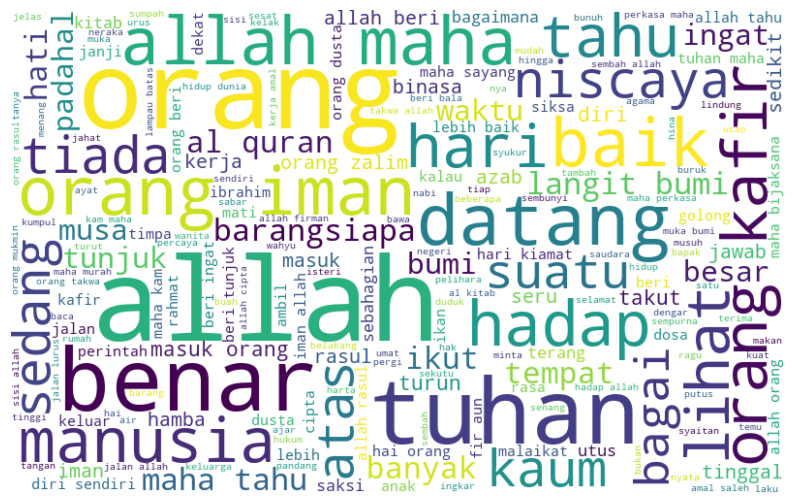

In [53]:
# untuk melihat semua kata yang mengalami sentimen analisis

all_words = ' '.join([text for text in data['clean']])
plot_wordCloud(all_words)

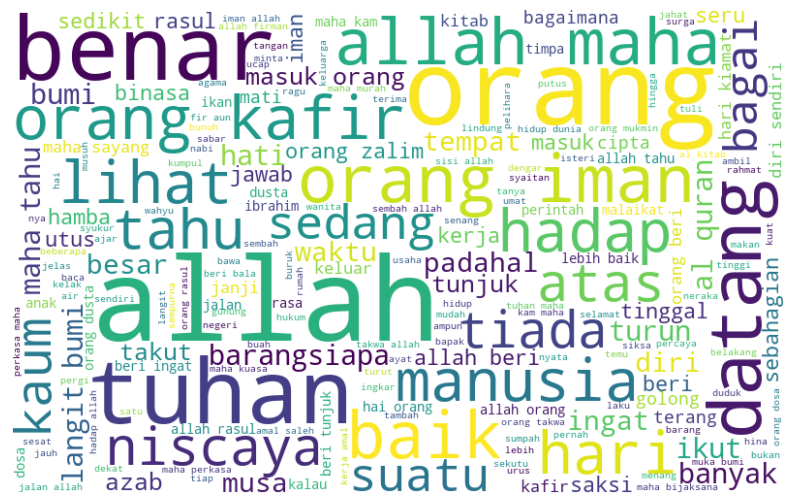

In [54]:
#untuk melihat kata kata yang normal atau netral
normal_words = ' '.join(text for text in data['clean'][data['sentimen'] == 'Netral']) 
plot_wordCloud(normal_words)

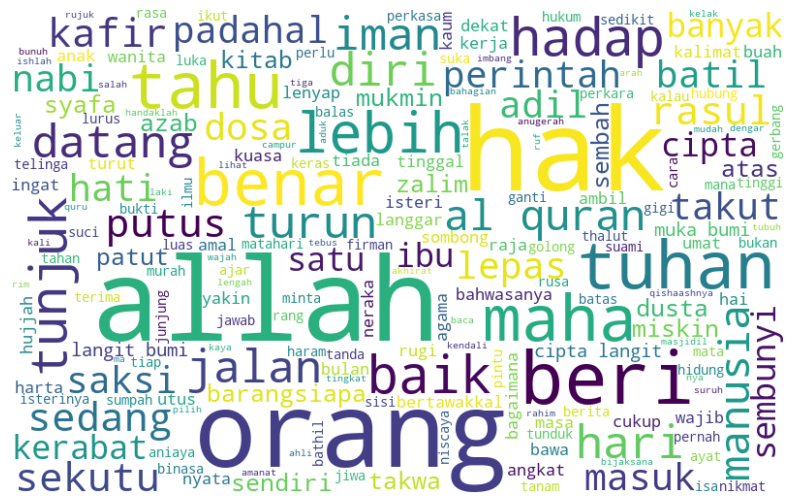

In [55]:
#untuk melihat kata kata yang positif
normal_words = ' '.join(text for text in data['clean'][data['sentimen'] == 'Positif']) 
plot_wordCloud(normal_words)

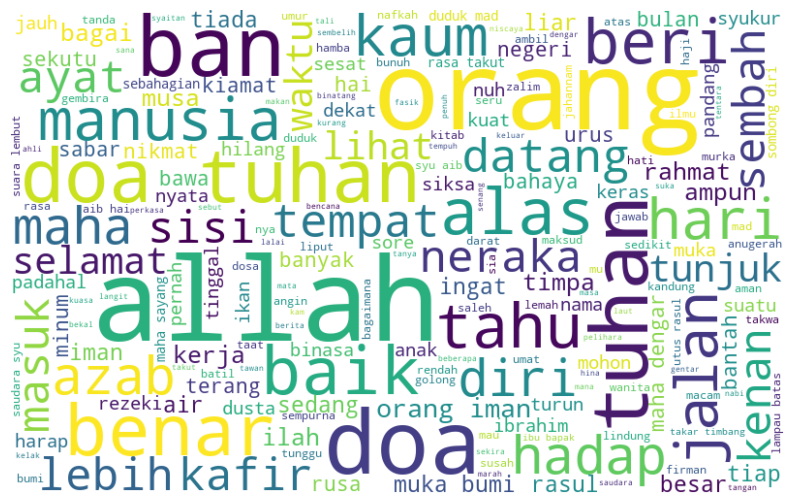

In [56]:
#untuk melihat kata kata yang negatif
normal_words = ' '.join(text for text in data['clean'][data['sentimen'] == 'Negatif']) 
plot_wordCloud(normal_words)

C:\Users\shefi\AppData\Local\Temp\ipykernel_23844\996222685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="sentimen", palette=color_mapper)


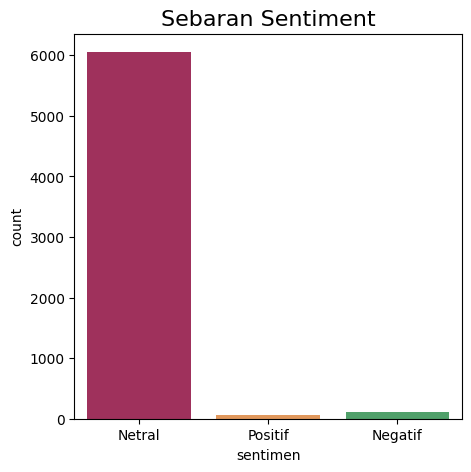

In [57]:
plt.figure(figsize=(5, 5))
sns.countplot(data=data, x="sentimen", palette=color_mapper)
plt.title("Sebaran Sentiment", fontsize=16)
plt.xticks(["Negatif", "Netral", "Positif"], ["Negatif", "Netral", "Positif"])
plt.show()

In [58]:
from sklearn import model_selection

In [59]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(data['clean'], data['sentimen'], test_size = 0.1, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama

In [60]:
df_train90 = pd.DataFrame()
df_train90['clean'] = train_X
df_train90['sentimen'] = train_Y

df_test10 = pd.DataFrame()
df_test10['clean'] = test_X
df_test10['sentimen'] = test_Y

In [61]:
df_train90

,clean,sentimen
5978,takhta tinggi,Netral
557,tuhan iman hingga hakim hadap perkara selisih ...,Netral
979,hai anak adam turun pakai tutup aurat pakai in...,Netral
5620,masuk rahmat orang zalim sedia azab pedih,Netral
2131,firman bani israil diam negeri datang masa ban...,Netral
...,...,...
4931,nikmat tuhan mana dusta,Netral
3264,musa cukup umur sempurna akal ikan hikmah tahu...,Netral
1653,saudara yusuf datang nya yusuf kenal sedang kenal,Netral
2607,allah masuk orang iman kerja amal saleh surga ...,Netral


In [62]:
df_test10

,clean,sentimen
2626,binatang hadyu beberapa manfaat waktu tempat w...,Netral
4852,datang cepat seru orang kafir hari berat,Netral
4587,azab orang munafik laki perempuan orang musyri...,Netral
2940,tuhan seru musa datang kaum zalim,Netral
5598,beri makan harap keridhaan allah balas terima ...,Netral
...,...,...
4519,orang kafir orang iman kalau sekira suatu baik...,Netral
396,golong umat seru kebaji suruh ma ruf cegah mun...,Netral
1900,sembah tuhan datang yakin,Netral
283,orang iman kerja amal saleh diri shalat tunai ...,Netral


In [63]:
df_train90.to_csv("df_train90.csv")
df_test10.to_csv("df_test10.csv")

# Extracting Features

In [64]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_9010 = TfidfVectorizer(max_features = 5000)
tfidf_vect_9010.fit(data['clean'])
train_X_tfidf_9010 = tfidf_vect_9010.transform(df_train90['clean'])
test_X_tfidf_9010 = tfidf_vect_9010.transform(df_test10['clean'])

In [65]:
tfidf_vect_9010

TfidfVectorizer(max_features=5000)

In [66]:
print(train_X_tfidf_9010)

  (0, 2332)	0.5217421261751559
  (0, 2180)	0.8531032491874754
  (1, 2364)	0.1327504327430747
  (1, 2286)	0.24764662991080716
  (1, 2002)	0.3652158499387906
  (1, 1966)	0.2859278241906477
  (1, 1793)	0.22284050464840516
  (1, 1743)	0.23873937935928727
  (1, 1672)	0.31154405991760975
  (1, 840)	0.15851205343662195
  (1, 823)	0.23443640450882056
  (1, 783)	0.26610873078026265
  (1, 754)	0.2007314774574324
  (1, 718)	0.34403152864850944
  (1, 705)	0.34508241226707415
  (1, 313)	0.27122684809018693
  (2, 2394)	0.2062322037860015
  (2, 2392)	0.14340215574459664
  (2, 2195)	0.1702949053296673
  (2, 2184)	0.1557715925170136
  (2, 1922)	0.17963345654253554
  (2, 1584)	0.6841321787791146
  (2, 1459)	0.1914106281864875
  (2, 1130)	0.16354305570790942
  (2, 847)	0.148979003840912
  :	:
  (5607, 468)	0.32403311213186986
  (5607, 321)	0.18483892197441387
  (5607, 207)	0.27597945840837257
  (5607, 195)	0.2106359345823052
  (5607, 47)	0.360093081467122
  (5608, 2492)	0.5801029809658153
  (5608, 1931)	

In [67]:
print(test_X_tfidf_9010)

  (0, 2460)	0.2139168790954186
  (0, 2459)	0.2767982478331126
  (0, 2263)	0.20066928018553798
  (0, 1975)	0.3115086719294927
  (0, 1330)	0.2721231690131953
  (0, 709)	0.4267378664493711
  (0, 367)	0.26786986752028685
  (0, 263)	0.25329111252698966
  (0, 197)	0.4076081452686314
  (0, 147)	0.4267378664493711
  (1, 2019)	0.4168888972577305
  (1, 1570)	0.1591635349537001
  (1, 967)	0.3173174929577241
  (1, 746)	0.2947009400586705
  (1, 500)	0.30038612519209107
  (1, 448)	0.5366935446707276
  (1, 313)	0.48482965665962247
  (2, 2263)	0.14856266807641963
  (2, 1935)	0.20876587610032496
  (2, 1718)	0.29171853863918124
  (2, 1662)	0.36992717975783374
  (2, 1570)	0.13271212655484216
  (2, 1543)	0.1537062465029406
  (2, 1506)	0.2213403478458506
  (2, 1489)	0.22633869187221445
  :	:
  (620, 436)	0.365628247596589
  (621, 2483)	0.6706692323280445
  (621, 2364)	0.32715743361474636
  (621, 1972)	0.5212112772424442
  (621, 500)	0.4141371740310497
  (622, 2501)	0.32529434054240125
  (622, 2382)	0.32529

In [68]:
print(train_X_tfidf_9010.shape)
print(test_X_tfidf_9010.shape)

(5611, 2514)
(624, 2514)


In [69]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_9010.vocabulary_)

{'sebut': 1930, 'nama': 1520, 'allah': 73, 'maha': 1293, 'murah': 1486, 'sayang': 1918, 'puji': 1724, 'tuhan': 2364, 'semesta': 1980, 'alam': 59, 'kuasa': 1130, 'hari': 746, 'balas': 207, 'sembah': 1972, 'minta': 1445, 'tunjuk': 2389, 'jalan': 891, 'lurus': 1279, 'orang': 1570, 'beri': 321, 'nikmat': 1547, 'bukan': 395, 'murka': 1489, 'sesat': 2022, 'alif': 67, 'laam': 1155, 'miim': 1438, 'kitab': 1117, 'ragu': 1770, 'takwa': 2184, 'iman': 840, 'ghaib': 672, 'diri': 546, 'shalat': 2039, 'nafkah': 1514, 'sebahagian': 1922, 'rezeki': 1818, 'anugerah': 110, 'turun': 2392, 'yakin': 2483, 'akhirat': 52, 'untung': 2430, 'kafir': 967, 'ingat': 847, 'kunci': 1143, 'hati': 754, 'dengar': 516, 'lihat': 1239, 'tutup': 2394, 'siksa': 2069, 'berat': 313, 'manusia': 1340, 'tipu': 2339, 'padahal': 1574, 'sendiri': 1989, 'sedang': 1931, 'sadar': 1862, 'sakit': 1871, 'tambah': 2188, 'pedih': 1623, 'dusta': 568, 'bila': 359, 'rusa': 1851, 'muka': 1465, 'bumi': 405, 'jawab': 912, 'baik': 195, 'rim': 1825

# Pelatihan Model

In [70]:
# Proses Pelatihan

from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X_tfidf_9010,train_Y)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

SVC(gamma='auto_deprecated', kernel='linear')

In [71]:
# Proses Pengujian

from sklearn.metrics import accuracy_score

predictions_SVM_9010 = model.predict(test_X_tfidf_9010)
test_prediction_9010 = pd.DataFrame()
test_prediction_9010['clean'] = test_X
test_prediction_9010['sentimen'] = predictions_SVM_9010
SVM_accuracy_9010 = accuracy_score(predictions_SVM_9010, test_Y)*100
SVM_accuracy_9010 = round(SVM_accuracy_9010,1)

In [72]:
test_prediction_9010

,clean,sentimen
2626,binatang hadyu beberapa manfaat waktu tempat w...,Netral
4852,datang cepat seru orang kafir hari berat,Netral
4587,azab orang munafik laki perempuan orang musyri...,Netral
2940,tuhan seru musa datang kaum zalim,Netral
5598,beri makan harap keridhaan allah balas terima ...,Netral
...,...,...
4519,orang kafir orang iman kalau sekira suatu baik...,Netral
396,golong umat seru kebaji suruh ma ruf cegah mun...,Netral
1900,sembah tuhan datang yakin,Netral
283,orang iman kerja amal saleh diri shalat tunai ...,Netral


In [73]:
test_prediction_9010.to_csv("test_prediction_9010.csv")

In [74]:
SVM_accuracy_9010

99.8

In [75]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_SVM_9010))


Here is the classification report:
              precision    recall  f1-score   support

     Negatif       1.00      0.89      0.94         9
      Netral       1.00      1.00      1.00       611
     Positif       1.00      1.00      1.00         4

    accuracy                           1.00       624
   macro avg       1.00      0.96      0.98       624
weighted avg       1.00      1.00      1.00       624



In [1]:
my_list 1 = [1, 2, 3]
my_list_2 = []
for v in my list 1:
  my_list_2.insert(0, v)
print(my_list 2)

SyntaxError: invalid syntax (1139245942.py, line 1)

In [ ]:
var = 1
while var <10:
    print